# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

**Описание данных**

Каждый объект в наборе данных — это информация о поведении одного пользователя за месяц. Известно:

 - сalls — количество звонков,
 - minutes — суммарная длительность звонков в минутах,
 - messages — количество sms-сообщений,
 - mb_used — израсходованный интернет-трафик в Мб,
 - is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0).
 
**План работы**

 - Изучить исходный датафрейм
 - разделить датафрейм на обучающую, валидационную и тестовую выборки в соотношениее 60/20/20 соответственно
 - исследовать модели классификации (решающее дерево, случайный лес, логистическая регрессия)
 - подобрать оптимальные параметры для каждой модели
 - оценить точность моделей на тестовой выборке
 - проверить модель на адекватность

## Изучение файла

In [25]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [26]:
data = pd.read_csv('/datasets/users_behavior.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [27]:
data.head()

,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [28]:
data.shape

(3214, 5)

**ВЫВОДЫ**

Стоит задача классификации, за целевой признак возьмем столбец is_ultra. Остальные признаки помогут нам предсказывать решение по столбцу is_ultra.

## Разбивка данных на выборки

Разбиваем выборки в соотношении `60/20/20`
 - тренировачная выборка `60%`
 - валидационная выборка `20%`
 - тестовая выборка `20%`

In [29]:
train_data, prom_data = train_test_split(data, test_size=0.4, random_state=12345)
valid_data, test_data = train_test_split(prom_data, test_size=0.5, random_state=12345)

print('Обучающая выборка train_data ', train_data.shape)
print('Валидационная выборка valid_data', valid_data.shape)
print('Тестовая выборка test_data', test_data.shape)

Обучающая выборка train_data  (1928, 5)
Валидационная выборка valid_data (643, 5)
Тестовая выборка test_data (643, 5)


Создадим таблицы признаков и таблица целевых признаков для каждой выборки

In [30]:
train_data_features = train_data.drop(['is_ultra'], axis=1)
train_data_target = train_data['is_ultra']

valid_data_features = valid_data.drop(['is_ultra'], axis=1)
valid_data_target = valid_data['is_ultra']

test_data_features = test_data.drop(['is_ultra'], axis=1)
test_data_target = test_data['is_ultra']

**ВЫВОДЫ**

Данные разделили в соотношении 60/20/20.

 - Обучение пройдет на данных train_data

 - Валидация модели на данных valid_data

 - Тестировании модели пройдет на данных test_data

## Исследование модели

Рассмотрим следующие алгоритмы обучения для задачи классификации:
 - `Дерево решений`
 - `Случайный лес`
 - `Логистическая регрессия`

### Дерево решений

В данном блоке исследования будут выполнены следующие действия:

 - обучим модель дерева решений на тренировочной выборке
 - изучим точность предсказаний на тренировочной выборке в зависимости от глубины дерева
 - изучим точность предсказаний на валидационной выборке в зависимости от глубины дерева
 - сравним показатели и выберем наилучший
 - построим графики зависимости точности модели от гиперпараметра глубина дерева
 - изучим зависимость точности модели от других гиперпараметров (`criterion`, `min_samples_split`, `min_samples_leaf`, `splitter`)

max_depth =  1 :0.7542768273716952
max_depth =  2 :0.7822706065318819
max_depth =  3 :0.7853810264385692
max_depth =  4 :0.7791601866251944
max_depth =  5 :0.7791601866251944
max_depth =  6 :0.7838258164852255
max_depth =  7 :0.7822706065318819
max_depth =  8 :0.7791601866251944
max_depth =  9 :0.7822706065318819
max_depth =  10 :0.7744945567651633
max_depth =  11 :0.7620528771384136
max_depth =  12 :0.7620528771384136
max_depth =  13 :0.7558320373250389
max_depth =  14 :0.7589424572317263
max_depth =  15 :0.7465007776049767
max_depth =  16 :0.7340590979782271
max_depth =  17 :0.7356143079315708
max_depth =  18 :0.7309486780715396
max_depth =  19 :0.7278382581648523
max_depth =  20 :0.7216174183514774
max_depth =  21 :0.7278382581648523
max_depth =  22 :0.7262830482115086
max_depth =  23 :0.7169517884914464
max_depth =  24 :0.713841368584759
max_depth =  25 :0.713841368584759
max_depth =  26 :0.713841368584759
max_depth =  27 :0.713841368584759
max_depth =  28 :0.713841368584759
max_de

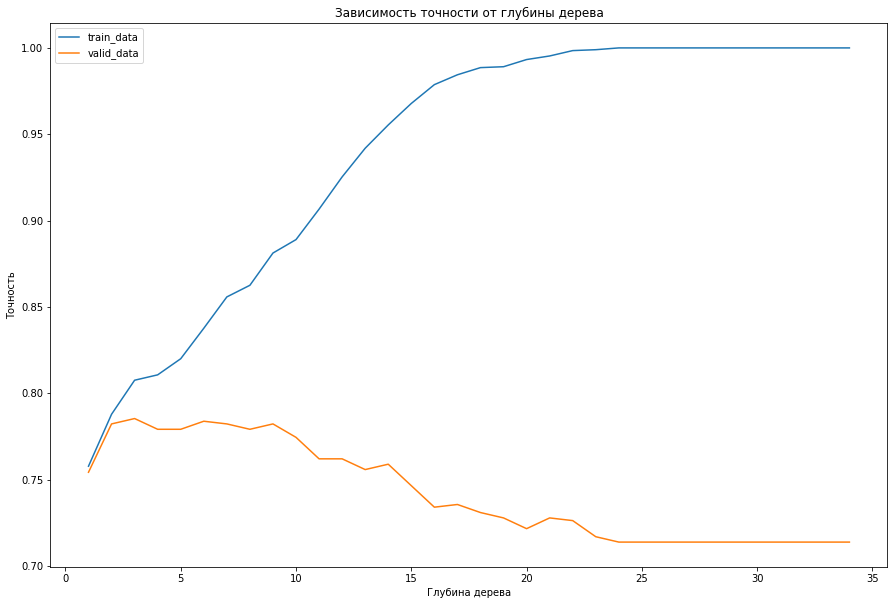

In [31]:
best_model_tree = None
best_result_tree = 0
model_depth = 0
epohs_tree = []
train_result_tree_list = []
valid_result_tree_list = []

for depth in range(1, 35):
    model = DecisionTreeClassifier(random_state=12345, max_depth=depth)
    model.fit(train_data_features, train_data_target)
    predictions_train = model.predict(train_data_features)
    train_result_tree = accuracy_score(train_data_target, predictions_train)
    epohs_tree.append(depth)
    train_result_tree_list.append(train_result_tree)
    
    predictions_valid = model.predict(valid_data_features)
    valid_result_tree = accuracy_score(valid_data_target, predictions_valid)
    valid_result_tree_list.append(valid_result_tree)
    print('max_depth = ', depth, ':', end='')
    print(valid_result_tree)
    if valid_result_tree > best_result_tree:
        best_result_tree = valid_result_tree
        best_model_tree = model
        model_depth = depth
        
print(best_result_tree, 'Точность валидационной модели: ', model_depth)

plt.figure(figsize=(15, 10))
plt.plot(epohs_tree, train_result_tree_list, label='train_data');
plt.plot(epohs_tree, valid_result_tree_list, label='valid_data');
plt.xlabel('Глубина дерева')
plt.ylabel('Точность')
plt.title('Зависимость точности от глубины дерева')
plt.legend()
plt.show()
    
    

При увеличении глубины дерева производительность модели на обучающей выборке продолжает улучшаться, а на валидационной выборке достигает плато и начинает ухудшаться, это может указывать на переобучение.

Наилучшая глубина дерева - 3 с точностью 0.7853810264385692

Посмотрим на изменение точности модели в зависимости от гиперпараметра criterion. Так как по умолчанию гиперпараметр имеет значение `'gini'` изучим точность модели со значением `'entropy'`

In [32]:
best_model_tree = DecisionTreeClassifier(random_state=12345, max_depth=3, criterion='entropy')
best_model_tree.fit(train_data_features, train_data_target)
valid_predictions = best_model_tree.predict(valid_data_features)
entropy_result = accuracy_score(valid_data_target, valid_predictions)
print('Точность модели с гиперпараметром entropy: ', entropy_result)
if best_result_tree < entropy_result:
    best_result_tree = entropy_result
    print('Точность модели увличилась, оставляем гиперпараметр entropy')
elif best_result_tree == entropy_result:
    print('Точность модели не изменилась, оставляем гиперпараметр gini')
else:
    print('Точность модели уменьшилась, оставляем гиперпараметр gini')


Точность модели с гиперпараметром entropy:  0.7853810264385692
Точность модели не изменилась, оставляем гиперпараметр gini


Изучим точность модели в зависимости от параметра min_samples_split. Увеличение этого параметра может привести к более устойчивому дереву с меньшим риском переобучения.

min_samples_split =  2 :0.7853810264385692
min_samples_split =  3 :0.7853810264385692
min_samples_split =  4 :0.7853810264385692
min_samples_split =  5 :0.7853810264385692
min_samples_split =  6 :0.7853810264385692
min_samples_split =  7 :0.7853810264385692
min_samples_split =  8 :0.7853810264385692
min_samples_split =  9 :0.7853810264385692
0.7853810264385692 Точность валидационной модели:  2


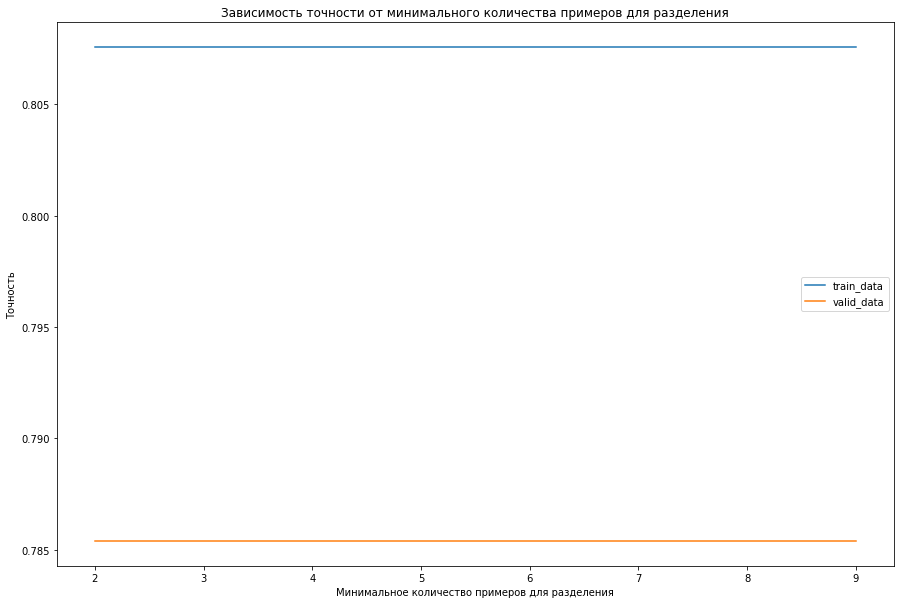

In [33]:
epohs_samples_split = []
train_samples_split = []
valid_samples_split = []
min_samples = 0
best_result_tree = 0

for n in range(2, 10):
    best_model_tree = DecisionTreeClassifier(random_state=12345, max_depth=3, min_samples_split=n)
    best_model_tree.fit(train_data_features, train_data_target)
    
    predictions_train = best_model_tree.predict(train_data_features)
    
    train_result_tree = accuracy_score(train_data_target, predictions_train)
    
    epohs_samples_split.append(n)
    train_samples_split.append(train_result_tree)
    
    predictions_valid = best_model_tree.predict(valid_data_features)
    
    valid_result_tree = accuracy_score(valid_data_target, predictions_valid)
    valid_samples_split.append(valid_result_tree)
    
    print('min_samples_split = ', n, ':', end='')
    print(valid_result_tree)
    
    if valid_result_tree > best_result_tree:
        best_result_tree = valid_result_tree
        best_model_tree = model
        min_samples = n
    
print(best_result_tree, 'Точность валидационной модели: ', min_samples)  
    
plt.figure(figsize=(15, 10))
plt.plot(epohs_samples_split, train_samples_split, label='train_data');
plt.plot(epohs_samples_split, valid_samples_split, label='valid_data');
plt.xlabel('Минимальное количество примеров для разделения')
plt.ylabel('Точность')
plt.title('Зависимость точности от минимального количества примеров для разделения')
plt.legend()
plt.show()
    

Параметр `'min_samples_split'` не влияет на точность данной модели.

Посмотрим на параметр `'min_samples_leaf'`

min_samples_split =  1 :0.7853810264385692
min_samples_split =  2 :0.7853810264385692
min_samples_split =  3 :0.7853810264385692
min_samples_split =  4 :0.7853810264385692
min_samples_split =  5 :0.7853810264385692
min_samples_split =  6 :0.7853810264385692
min_samples_split =  7 :0.7853810264385692
min_samples_split =  8 :0.7853810264385692
min_samples_split =  9 :0.7853810264385692
0.7853810264385692 Точность валидационной модели:  1


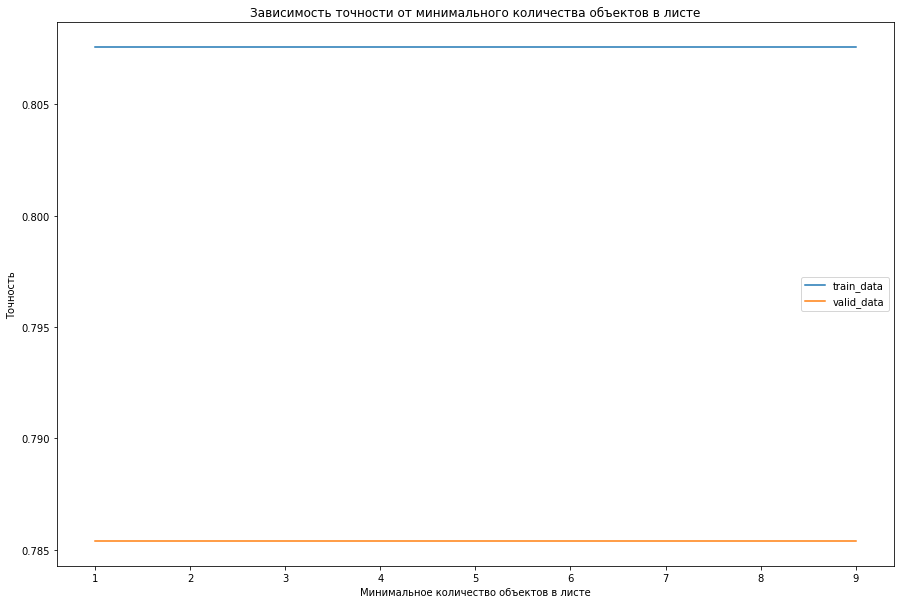

In [34]:
epohs_samples_split = []
train_samples_split = []
valid_samples_split = []
min_samples = 0
best_result_tree = 0

for n in range(1, 10):
    best_model_tree = DecisionTreeClassifier(random_state=12345, max_depth=3, min_samples_leaf=n)
    best_model_tree.fit(train_data_features, train_data_target)
    
    predictions_train = best_model_tree.predict(train_data_features)
    
    train_result_tree = accuracy_score(train_data_target, predictions_train)
    
    epohs_samples_split.append(n)
    train_samples_split.append(train_result_tree)
    
    predictions_valid = best_model_tree.predict(valid_data_features)
    
    valid_result_tree = accuracy_score(valid_data_target, predictions_valid)
    valid_samples_split.append(valid_result_tree)
    
    print('min_samples_split = ', n, ':', end='')
    print(valid_result_tree)
    
    if valid_result_tree > best_result_tree:
        best_result_tree = valid_result_tree
        best_model_tree = model
        min_samples = n
    
print(best_result_tree, 'Точность валидационной модели: ', min_samples)  
    
plt.figure(figsize=(15, 10))
plt.plot(epohs_samples_split, train_samples_split, label='train_data');
plt.plot(epohs_samples_split, valid_samples_split, label='valid_data');
plt.xlabel('Минимальное количество объектов в листе')
plt.ylabel('Точность')
plt.title('Зависимость точности от минимального количества объектов в листе')
plt.legend()
plt.show()

Параметр `'min_samples_leaf'` не влияет на точность данной модели.

Посмотрим на параметр `'splitter'`. По умолчанию гиперпараметр имеет значение `'best'`. Заменим его на `'random'`

In [35]:
best_model_tree = DecisionTreeClassifier(random_state=12345, max_depth=3, splitter='random')
best_model_tree.fit(train_data_features, train_data_target)
valid_predictions = best_model_tree.predict(valid_data_features)
random_result = accuracy_score(valid_data_target, valid_predictions)
print('Точность модели с гиперпараметром random: ', random_result)
if best_result_tree < random_result:
    best_result_tree = random_result
    print('Точность модели увличилась, оставляем гиперпараметр random')
elif best_result_tree == random_result:
    print('Точность модели не изменилась, оставляем гиперпараметр best')
else:
    print('Точность модели уменьшилась, оставляем гиперпараметр best')

Точность модели с гиперпараметром random:  0.7387247278382582
Точность модели уменьшилась, оставляем гиперпараметр best


Наиболее точной моделью обученной алгоритмом дерево решений примем модель с гиперпараметрами:
 - `max_depth` = 3
 - `criterion` = gini
 - `min_samples_split` = 2
 - `min_samples_leaf` = 1
 - `splitter` = best

### Случайный лес

В данном блоке исследования будут выполнены следующие действия:

 - обучим модель случайного леса на тренировочной выборке
 - изучим точность предсказаний на тренировочной выборке в зависимости от количества деревьев
 - изучим точность предсказаний на валидационной выборке в зависимости от количества деревьев
 - сравним показатели и выберем наилучший
 - построим графики зависимости точности модели от гиперпараметра количества деревьев
 - изучим зависимость точности модели от других гиперпараметров (`criterion`, `max_depth`)


количество деревьев =  1 :0.7107309486780715
количество деревьев =  2 :0.7636080870917574
количество деревьев =  3 :0.7387247278382582
количество деревьев =  4 :0.7713841368584758
количество деревьев =  5 :0.749611197511664
количество деревьев =  6 :0.7807153965785381
количество деревьев =  7 :0.7682737169517885
количество деревьев =  8 :0.7822706065318819
количество деревьев =  9 :0.7729393468118196
количество деревьев =  10 :0.7853810264385692
количество деревьев =  11 :0.7838258164852255
количество деревьев =  12 :0.7869362363919129
количество деревьев =  13 :0.7822706065318819
количество деревьев =  14 :0.7838258164852255
количество деревьев =  15 :0.7838258164852255
количество деревьев =  16 :0.7869362363919129
количество деревьев =  17 :0.7869362363919129
количество деревьев =  18 :0.7931570762052877
количество деревьев =  19 :0.7884914463452566
количество деревьев =  20 :0.7869362363919129
количество деревьев =  21 :0.7931570762052877
количество деревьев =  22 :0.788491446345256

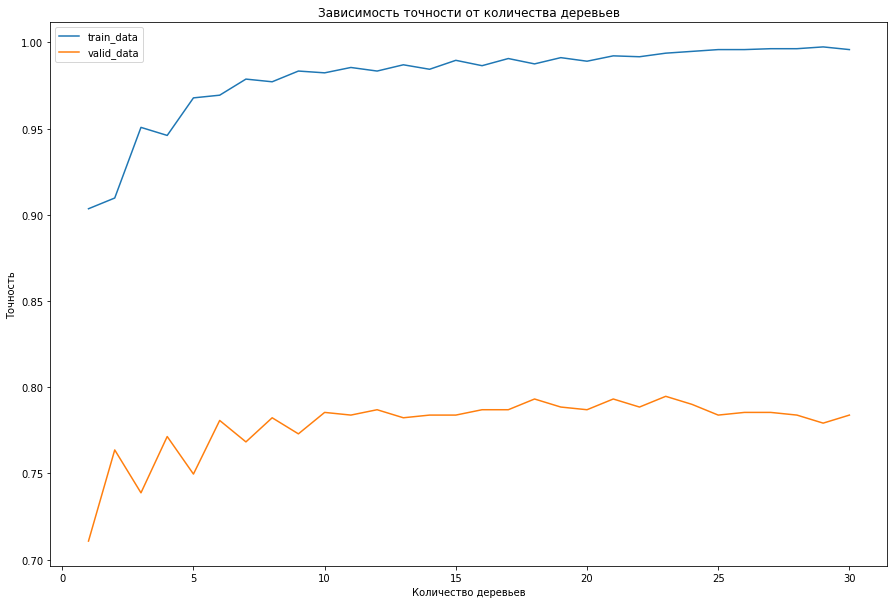

In [36]:
best_model_forest = None
best_result_forest = 0
model_est = 0
epohs_forest = []
train_result_forest_list = []
valid_result_forest_list = []

for est in range(1, 31):
    model_forest = RandomForestClassifier(random_state=12345, n_estimators=est)
    model_forest.fit(train_data_features, train_data_target)
    predictions_forest_train = model_forest.predict(train_data_features)
    result_forest_train = accuracy_score(train_data_target, predictions_forest_train)
    epohs_forest.append(est)
    train_result_forest_list.append(result_forest_train)
    
    predictions_forest_valid = model_forest.predict(valid_data_features)
    result_forest_valid = accuracy_score(valid_data_target, predictions_forest_valid)
    valid_result_forest_list.append(result_forest_valid)
    print('количество деревьев = ', est, ':', end='')
    print(result_forest_valid)
    if best_result_forest < result_forest_valid:
        best_result_forest = result_forest_valid
        best_model_forest = model_forest
        model_est = est
        
print(best_result_forest, 'Точность валидационной модели: ', model_est, ' деревьев' )

plt.figure(figsize=(15, 10))
plt.plot(epohs_forest, train_result_forest_list, label='train_data');
plt.plot(epohs_forest, valid_result_forest_list, label='valid_data');
plt.xlabel('Количество деревьев')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества деревьев')
plt.legend()
plt.show()

Наибольшая точность у модели с количеством деревьев 23 - `0.7947122861586314`

Увеличение количества деревьев:

 - Улучшение стабильности. Увеличение количества деревьев в модели случайного леса приводит к повышению стабильности модели;
 - Улучшение точности. Начиная с некоторого значения, увеличение количества деревьев может улучшить точность модели;
 - Увеличение времени обучения: Увеличение количества деревьев ведет к увеличению времени обучения модели. Каждое дерево строится независимо от остальных, поэтому большее количество деревьев требует больше времени на их построение;
 - Риск переобучения. Слишком большое количество деревьев может привести к переобучению модели.

Таким образом для данной модели будем считать оптимальным значение гиперпараметра `n_estimators` = 23 дерева, так как такая модель обеспечивает наилучшую точность, а дальнейшее увеличение количества деревьев увеличивает время обучения, а так же риск переобучения модели, что видно на графике (снижение точности модели на валидационной выборке после значения 23).

Посмотрим на влияние параметры глубины деревьев `max_depth`

глубина деревьев =  1 :0.7511664074650077
глубина деревьев =  2 :0.7853810264385692
глубина деревьев =  3 :0.7884914463452566
глубина деревьев =  4 :0.7853810264385692
глубина деревьев =  5 :0.7884914463452566
глубина деревьев =  6 :0.8009331259720062
глубина деревьев =  7 :0.8009331259720062
глубина деревьев =  8 :0.7962674961119751
глубина деревьев =  9 :0.7916018662519441
глубина деревьев =  10 :0.7931570762052877
глубина деревьев =  11 :0.7838258164852255
глубина деревьев =  12 :0.7978227060653188
глубина деревьев =  13 :0.7916018662519441
глубина деревьев =  14 :0.776049766718507
глубина деревьев =  15 :0.7869362363919129
глубина деревьев =  16 :0.7900466562986003
глубина деревьев =  17 :0.7838258164852255
глубина деревьев =  18 :0.7869362363919129
глубина деревьев =  19 :0.7838258164852255
глубина деревьев =  20 :0.7884914463452566
глубина деревьев =  21 :0.7869362363919129
глубина деревьев =  22 :0.7822706065318819
глубина деревьев =  23 :0.7853810264385692
глубина деревьев =  2

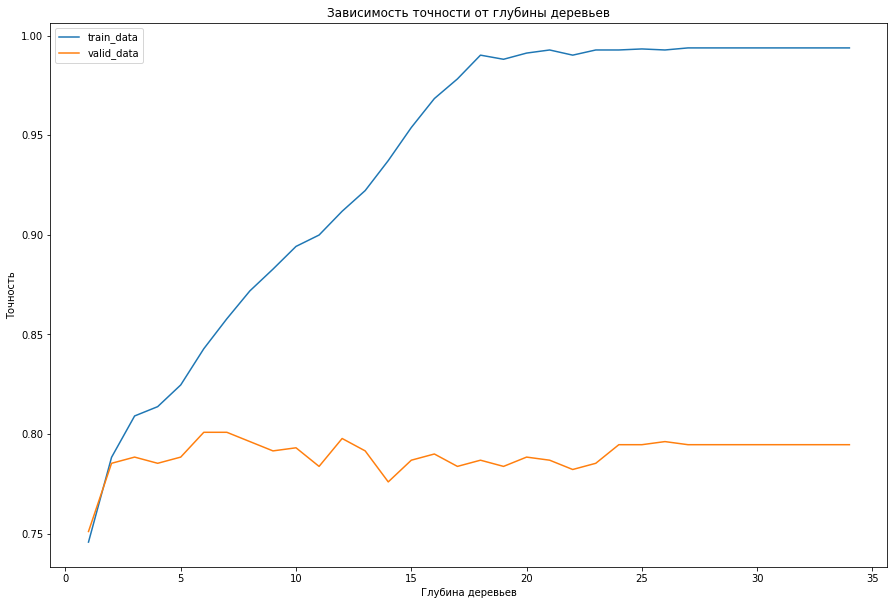

In [37]:
best_model_forest_depth = None
best_result_forest_depth = 0
model_forest_depth = 0
epohs_forest_depth = []
train_result_forest_depth_list = []
valid_result_forest_depth_list = []


for depth in range(1, 35):
    best_model_forest_depth = RandomForestClassifier(random_state=12345, n_estimators=23, max_depth=depth)
    best_model_forest_depth.fit(train_data_features, train_data_target)
    predictions_forest_depth_train = best_model_forest_depth.predict(train_data_features)
    result_forest_depth_train = accuracy_score(train_data_target, predictions_forest_depth_train)
    epohs_forest_depth.append(depth)
    train_result_forest_depth_list.append(result_forest_depth_train)
    
    predictions_forest_depth_valid = best_model_forest_depth.predict(valid_data_features)
    result_forest_depth_valid = accuracy_score(valid_data_target, predictions_forest_depth_valid)
    valid_result_forest_depth_list.append(result_forest_depth_valid)
    print('глубина деревьев = ', depth, ':', end='')
    print(result_forest_depth_valid)
    if best_result_forest_depth < result_forest_depth_valid:
        best_result_forest_depth = result_forest_depth_valid
        best_model_forest_depth = model_forest_depth
        model_forest_depth = depth
        
print(best_result_forest_depth, 'Точность валидационной модели: ', model_forest_depth, ' деревьев' )

plt.figure(figsize=(15, 10))
plt.plot(epohs_forest_depth, train_result_forest_depth_list, label='train_data');
plt.plot(epohs_forest_depth, valid_result_forest_depth_list, label='valid_data');
plt.xlabel('Глубина деревьев')
plt.ylabel('Точность')
plt.title('Зависимость точности от глубины деревьев')
plt.legend()
plt.show()

Наилучшее значение точности получилось у модели с глубиной дерева равной 6 - `0.8009331259720062`. Далее точность падает, а в последствии выходит на плато, что говорит о переобучении модели.

Изучим влияние гипепрпараметра `criterion` на точность модели. По умолчанию criterion=`gini`, заменим на `entropy`. 

In [38]:
best_result_forest = best_result_forest_depth
print('Лучший результат с gini: ', best_result_forest)


best_model_forest = RandomForestClassifier(random_state=12345,  n_estimators=23, max_depth=6, criterion='entropy')
best_model_forest.fit(train_data_features, train_data_target)
predictions_valid = best_model_forest.predict(valid_data_features)
entropy_result = accuracy_score(valid_data_target, predictions_valid)
if best_result_forest < entropy_result:
    best_result_forest = entropy_result
    print('Точность модели увеличилась, оставляем гиперпараметр entropy: ', best_result_forest)
elif best_result_forest == entropy_result:
    print('Точность модели не изменилась, оставляем гиперпараметр gini')
else:
    print('Точность модели уменьшилась, оставляем гиперпараметр gini')

Лучший результат с gini:  0.8009331259720062
Точность модели увеличилась, оставляем гиперпараметр entropy:  0.80248833592535


Гиперпараметр `criterion` со значением `entropy` даёт большую точность.

Наиболее точной моделью обученной алгоритмом случайный лес примем модель с гиперпараметрами:
 - `n_estimators` = 23
 - `max_depth` = 6
 - `criterion` = entropy

### Логистическая регрессия

В данном блоке исследования будут выполнены следующие действия:

 - обучим модель логистической регрессии на тренировочной выборке
 - изучим точность предсказаний на тренировочной выборке в зависимости от количества итераций
 - изучим точность предсказаний на валидационной выборке в зависимости от количества итераций
 - сравним показатели и выберем наилучший
 - построим графики зависимости точности модели от гиперпараметра количества итераций

количество итераций =  100 :0.7107309486780715
количество итераций =  200 :0.7107309486780715
количество итераций =  300 :0.7107309486780715
количество итераций =  400 :0.7107309486780715
количество итераций =  500 :0.7107309486780715
количество итераций =  600 :0.7107309486780715
количество итераций =  700 :0.7107309486780715
количество итераций =  800 :0.7107309486780715
количество итераций =  900 :0.7107309486780715
количество итераций =  1000 :0.7107309486780715
количество итераций =  1100 :0.7107309486780715
количество итераций =  1200 :0.7107309486780715
количество итераций =  1300 :0.7107309486780715
количество итераций =  1400 :0.7107309486780715
количество итераций =  1500 :0.7107309486780715
количество итераций =  1600 :0.7107309486780715
количество итераций =  1700 :0.7107309486780715
количество итераций =  1800 :0.7107309486780715
количество итераций =  1900 :0.7107309486780715
0.7107309486780715 Точность валидационной модели:  100  итераций


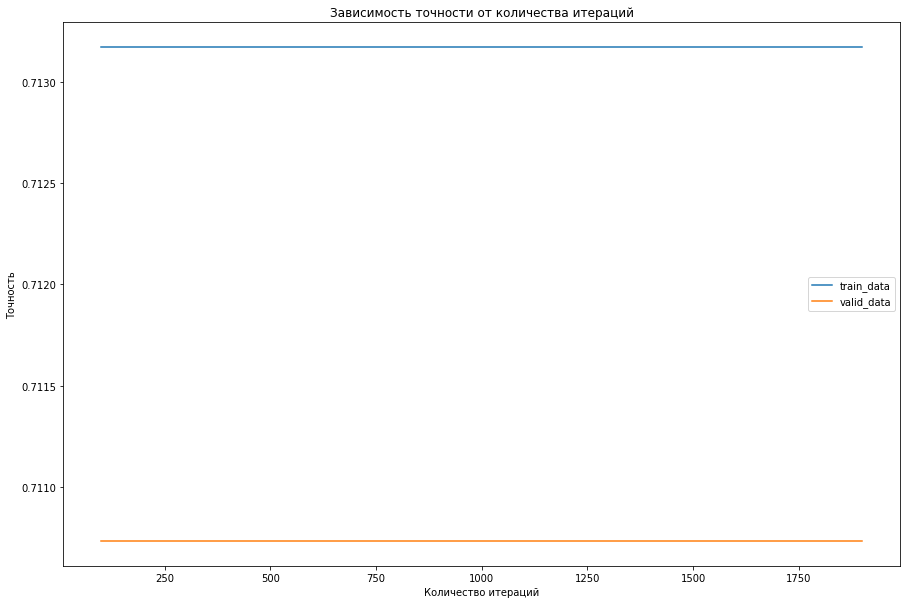

In [39]:
epohs_log = []
train_result_log_list = []
valid_result_log_list = []
best_result_log = 0
best_model_log = None
best_itr = 0

for itr in range(100, 2000, 100):
    model_log = LogisticRegression(random_state=12345, solver='lbfgs', max_iter=itr)
    model_log.fit(train_data_features, train_data_target)
    train_predictions_log = model_log.predict(train_data_features)
    train_result_log = accuracy_score(train_data_target, train_predictions_log)
    epohs_log.append(itr)
    train_result_log_list.append(train_result_log)
    
    valid_predictions_log = model_log.predict(valid_data_features)
    valid_result_log = accuracy_score(valid_data_target, valid_predictions_log)
    valid_result_log_list.append(valid_result_log)
    print('количество итераций = ', itr, ':', end='')
    print(valid_result_log)
    if best_result_log < valid_result_log:
        best_result_log = valid_result_log
        best_model_log = model_log
        best_itr = itr
        
print(best_result_log, 'Точность валидационной модели: ', best_itr, ' итераций' )

plt.figure(figsize=(15, 10))
plt.plot(epohs_log, train_result_log_list, label='train_data');
plt.plot(epohs_log, valid_result_log_list, label='valid_data');
plt.xlabel('Количество итераций')
plt.ylabel('Точность')
plt.title('Зависимость точности от количества итераций')
plt.legend()
plt.show()

Точность оказывается одинаковой и при значении параметра 100 и 2000. Чтобы не увеличивать время обучения модели, примем гиперпараметр `max_iter` = 100

### Вывод

Посмотрим какие наилучшие результаты получились для каждой модели:

In [40]:
print('Лучший результат дерева решений: ', best_result_tree)
print('Лучший результат случайного леса: ', best_result_forest)
print('Лучший результат логистической регрессии: ', best_result_log)

Лучший результат дерева решений:  0.7853810264385692
Лучший результат случайного леса:  0.80248833592535
Лучший результат логистической регрессии:  0.7107309486780715


Наиболее высокой точности получилось добиться для случайного леса - `0.80248833592535`

## Проверка модели на тестовой выборке

Так как наибольшей точности удалось добиться на модели случайного леса (`RandomForest`) - посмотрим, как модель справиться с тестовыми данными:

In [41]:
best_model_forest = RandomForestClassifier(random_state=12345,  n_estimators=23, max_depth=6, criterion='entropy')
best_model_forest.fit(train_data_features, train_data_target)
predictions_forest = best_model_forest.predict(test_data_features)
test_result_forest = accuracy_score(test_data_target, predictions_forest)
print('Точность случайного леса на тестовой выборке: ', test_result_forest)

Точность случайного леса на тестовой выборке:  0.7993779160186625


Модель случайного леса на тестовых данных показала результат `0.7993779160186625`.

Для решения поставленной задачи выбор данной модели будет оптимальным вариантом.

## Проверка модели на адекватность

Адекватность модели оценивается по нескольким параметрам. Для модели классификации это accuracy, precision и recall. Качество модели лучше всего отражают precision и recall и эти метрики складываются в F-мера как единую оценку модели.

In [42]:
test_predictions = best_model_forest.predict(test_data_features)
accuracy = accuracy_score(test_data_target, test_predictions)
precision = precision_score(test_data_target, test_predictions)
recall = recall_score(test_data_target, test_predictions)
print('accuracy =', accuracy, 'precision =', precision, 'recall =', recall)

accuracy = 0.7993779160186625 precision = 0.7846153846153846 recall = 0.5024630541871922


In [43]:
f_score = f1_score(test_data_target, test_predictions)
print('F-мера =', f_score)

F-мера = 0.6126126126126127


**Вывод**

Модель получилась среднего качества, что адекватно для подобных задач.

Проверим модель на адекватность в сравнении с DummyClassifier:

In [44]:
model_dummy = DummyClassifier(random_state=12345, strategy='most_frequent')
model_dummy.fit(train_data_features, train_data_target)
dummy_predictions = model_dummy.predict(test_data_features)
dummy_accuracy = accuracy_score(test_data_target, dummy_predictions)
print('accuracy DummyClassifier: ', dummy_accuracy)

accuracy DummyClassifier:  0.6842923794712286


Модель `RandomForest` получилась более точной, чем у `DummyClassifier`. Можно сделать вывод об адекватности обученной модели.

## Общий вывод

В ходе исследования было сделано:

 - Изучен файл с данными.
 - Разбиты данные на три выборки: обучающая, валидационная и тестовая.
 - Исследованы три модели классификации: Решающее дерево, Случайный лес и Логистическая регрессия.
 - Найдены оптимальные параметры для каждой модели и выбрана одна из них для обучения модели.
 - Оценена точность обученной модели.
 - Оценена адекватность модели.
 
Для обучения модели была использована выборка в 2000 значений. Этого может быть недостаточно для повышения ключевых параметров модели классификатора. Увеличение в 10 или 100 увеличит accuracy, precision и recall, а также время обучения.

Адекватность модели повышается с ростом количества значений.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x] Jupyter Notebook открыт
- [x] Весь код исполняется без ошибок
- [x] Ячейки с кодом расположены в порядке исполнения
- [x] Выполнено задание 1: данные загружены и изучены
- [x] Выполнено задание 2: данные разбиты на три выборки
- [x] Выполнено задание 3: проведено исследование моделей
    - [x] Рассмотрено больше одной модели
    - [x] Рассмотрено хотя бы 3 значения гипепараметров для какой-нибудь модели
    - [x] Написаны выводы по результатам исследования
- [x] Выполнено задание 3: Проведено тестирование
- [x] Удалось достичь accuracy не меньше 0.75
